In [68]:
from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model
from sklearn.model_selection import train_test_split
import pandas as pd

In [45]:
spam_data = pd.DataFrame()

In [46]:
def load_spam_data():
    spam_data = pd.read_csv(r"D:\Data Science\deep learning\assignment-1\spambase.data", header=None)
    
    #(spam_data-spam_data.mean(axis=0))/(spam_data)
    return (spam_data)

#print (load_spam_data())

In [47]:
spam_data = load_spam_data()
features = spam_data.iloc[:,:-1]
label = spam_data.iloc[:,-1:]
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.2)
#not_spam = spam_data[spam_data[57] == 0]
#spam = spam_data[spam_data[57] == 1]

In [48]:
x_train.shape,x_test.shape

((3680, 57), (921, 57))

In [49]:
y_train.shape,y_test.shape

((3680, 1), (921, 1))

In [50]:
train_mean = x_train.mean(axis=0)
train_std = x_train.std(axis=0)
x_train = (x_train - train_mean)/train_std
x_test = (x_test - train_mean)/train_std
#train_max = x_train.max(axis=0)
#x_train = x_train/train_max
#x_test = x_test/train_max

In [9]:
train_mean.head()

0    7.884130e-16
1    1.966875e-16
2    1.870484e-16
3    2.795130e-16
4   -5.996487e-17
dtype: float64

In [10]:
x_train.shape,x_test.shape

((3680, 57), (921, 57))

In [11]:
y_train.shape,y_test.shape

((3680, 1), (921, 1))

In [51]:
train_feature, val_feature, train_label, val_label = train_test_split(x_train,y_train,test_size = 0.2)

In [13]:
val_label.shape

(736, 1)

In [61]:
model = models.Sequential()
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation='relu', input_shape=(57,)))
#model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_feature,train_label,epochs=100,batch_size=128,validation_data=(val_feature,val_label))

Train on 2944 samples, validate on 736 samples
Epoch 1/100
2944/2944 [==============================] - 0s 47us/step - loss: 0.5552 - accuracy: 0.7599 - val_loss: 0.4504 - val_accuracy: 0.8370
Epoch 2/100
2944/2944 [==============================] - 0s 16us/step - loss: 0.4057 - accuracy: 0.8614 - val_loss: 0.3592 - val_accuracy: 0.8791
Epoch 3/100
2944/2944 [==============================] - 0s 18us/step - loss: 0.3296 - accuracy: 0.8933 - val_loss: 0.3052 - val_accuracy: 0.8981
Epoch 4/100
2944/2944 [==============================] - 0s 20us/step - loss: 0.2821 - accuracy: 0.9052 - val_loss: 0.2708 - val_accuracy: 0.9090
Epoch 5/100
2944/2944 [==============================] - 0s 24us/step - loss: 0.2515 - accuracy: 0.9137 - val_loss: 0.2489 - val_accuracy: 0.9171
Epoch 6/100
2944/2944 [==============================] - 0s 19us/step - loss: 0.2301 - accuracy: 0.9219 - val_loss: 0.2342 - val_accuracy: 0.9185
Epoch 7/100
2944/2944 [==============================] - 0s 17us/step - loss:

2944/2944 [==============================] - 0s 20us/step - loss: 0.1122 - accuracy: 0.9565 - val_loss: 0.1973 - val_accuracy: 0.9334
Epoch 57/100
2944/2944 [==============================] - 0s 19us/step - loss: 0.1116 - accuracy: 0.9565 - val_loss: 0.1982 - val_accuracy: 0.9334
Epoch 58/100
2944/2944 [==============================] - 0s 18us/step - loss: 0.1109 - accuracy: 0.9579 - val_loss: 0.1980 - val_accuracy: 0.9334
Epoch 59/100
2944/2944 [==============================] - 0s 16us/step - loss: 0.1099 - accuracy: 0.9586 - val_loss: 0.1976 - val_accuracy: 0.9348
Epoch 60/100
2944/2944 [==============================] - 0s 15us/step - loss: 0.1092 - accuracy: 0.9575 - val_loss: 0.1978 - val_accuracy: 0.9348
Epoch 61/100
2944/2944 [==============================] - 0s 14us/step - loss: 0.1087 - accuracy: 0.9575 - val_loss: 0.1980 - val_accuracy: 0.9321
Epoch 62/100
2944/2944 [==============================] - 0s 14us/step - loss: 0.1073 - accuracy: 0.9596 - val_loss: 0.1974 - val_a

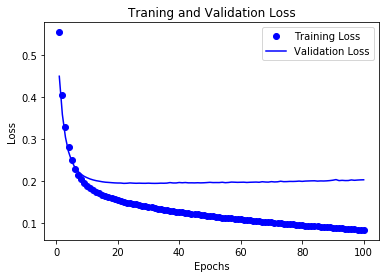

In [62]:
history_dict=history.history
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

#Loss Plot
plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Traning and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

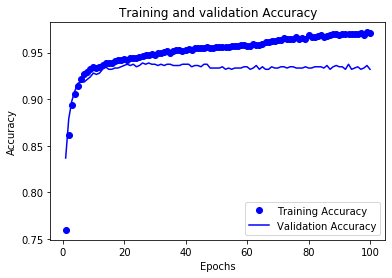

In [63]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training Accuracy')
plt.plot(epochs, val_acc_values,'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [64]:
model = models.Sequential()
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation='relu', input_shape=(57,)))
#model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=26,batch_size=128)

Epoch 1/26
3680/3680 [==============================] - 0s 34us/step - loss: 0.5584 - accuracy: 0.7465
Epoch 2/26
3680/3680 [==============================] - 0s 11us/step - loss: 0.3720 - accuracy: 0.8755
Epoch 3/26
3680/3680 [==============================] - 0s 11us/step - loss: 0.2955 - accuracy: 0.8967
Epoch 4/26
3680/3680 [==============================] - 0s 14us/step - loss: 0.2543 - accuracy: 0.9166
Epoch 5/26
3680/3680 [==============================] - 0s 13us/step - loss: 0.2298 - accuracy: 0.9245
Epoch 6/26
3680/3680 [==============================] - 0s 13us/step - loss: 0.2138 - accuracy: 0.9293
Epoch 7/26
3680/3680 [==============================] - 0s 13us/step - loss: 0.2027 - accuracy: 0.9321
Epoch 8/26
3680/3680 [==============================] - 0s 13us/step - loss: 0.1946 - accuracy: 0.9334
Epoch 9/26
3680/3680 [==============================] - 0s 14us/step - loss: 0.1879 - accuracy: 0.9345
Epoch 10/26
3680/3680 [==============================] - 0s 11us/step - l

In [65]:
results = model.evaluate(x_test, y_test)

921/921 [==============================] - 0s 117us/step


In [66]:
results

[0.17023301258052212, 0.9315961003303528]

In [70]:
model.save(r"D:\Data Science\deep learning\assignment-1\Q2-model.h5")

In [71]:
loaded_model = load_model(r"D:\Data Science\deep learning\assignment-1\Q2-model.h5")

In [72]:
loaded_model.evaluate(x_test, y_test)

921/921 [==============================] - 0s 38us/step


[0.17023301258052212, 0.9315961003303528]